<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کاریابی کوئرا
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
یک پروژه جذاب در پیش داریم. در این پروژه شما قرار است که یک کوئرایی واقعی شوید و با استفاده از داده های واقعی کاریابی کوئرا، یک سیستم پیشنهاد دهنده طراحی کنید که با استفاده از پالایش جمعی مبتنی بر کاربر (UBCF) به کاربران لیستی از اگهی های شغلی برای درخواست دادن ارائه دهد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا کتابخانه های مورد نیاز و مجموعه داده <code>quera-karyabi.csv</code> را به نوت بوک اضافه کن.
</font>
</p>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

df = pd.read_csv('quera-karyabi.csv')


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابعاد داده ها را نمایش بده.
<br>
توجه کنید که این تنها بخشی از داده های کاریابی کوئرا است. بدلیل محدودیت حافظه که ممکن بود برای اجرای پردازش ها روی کل دیتاست بوجود بیاید، تصمیم بر این شد تنها بخشی از داده ها استفاده شود.
</font>
</p>

In [2]:
df.shape

(200000, 15)

In [3]:
display(df.head(10))

,Applicant ID,Source,Order,Developer State,Seen,Job ID,Job Title,Careers Job - Job → Level,Careers Job - Job → Offers Remote,Careers Job - Job → Minimum Salary,Careers Job - Job → Maximum Salary,Careers Job - Job → Hit Count,Accounts City - City → Name,Careers Disqualifyreason - Disqualify Reason → Name,Job_ID_Title
0,4129056.0,1,0,25,True,280920,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,NaN,280920 - توسعه‌دهنده‌ی Front-end
1,6696432.0,2,0,30,True,293544,توسعه‌دهنده Back-end,junior,True,8000000.0,12000000.0,0,تهران,عدم تناسب با موقعیت شغلی,293544 - توسعه‌دهنده Back-end
2,4823712.0,2,4,20,True,68232,توسعه‌دهنده React,senior,False,8000000.0,12000000.0,0,مشهد,NaN,68232 - توسعه‌دهنده React
3,8995152.0,2,2,20,True,509400,Software Engineer (Front-end),junior,True,NaN,NaN,2092,تهران,NaN,509400 - Software Engineer (Front-end)
4,9651120.0,2,5,30,True,423384,برنامه‌نویس ارشد .NET,senior,True,NaN,NaN,423,آمل,عدم تناسب با موقعیت شغلی,423384 - برنامه‌نویس ارشد .NET
5,9744192.0,2,129,10,False,402288,کارآموز Front-end,intern,False,NaN,NaN,1944,تهران,NaN,402288 - کارآموز Front-end
6,7051488.0,1,110,10,False,516984,Python Back-end Web Developer,intern,True,NaN,NaN,2845,NaN,NaN,516984 - Python Back-end Web Developer
7,NaN,2,2,25,True,81552,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,NaN,81552 - توسعه‌دهنده‌ی Front-end
8,5500704.0,2,1,30,True,542352,کارآموز Back-end,junior,False,NaN,NaN,3365,مشهد,عدم تناسب با موقعیت شغلی,542352 - کارآموز Back-end
9,5105472.0,2,22,20,True,140400,توسعه‌دهنده لاراول,junior,True,4000000.0,6000000.0,0,تهران,NaN,140400 - توسعه‌دهنده لاراول


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از pandas تعداد داده های null در هر ستون را نمایش بده.
</font>
</p>

In [4]:
df.columns

Index(['Applicant ID', 'Source', 'Order', 'Developer State', 'Seen', 'Job ID',
       'Job Title', 'Careers Job - Job → Level',
       'Careers Job - Job → Offers Remote',
       'Careers Job - Job → Minimum Salary',
       'Careers Job - Job → Maximum Salary', 'Careers Job - Job → Hit Count',
       'Accounts City - City → Name',
       'Careers Disqualifyreason - Disqualify Reason → Name', 'Job_ID_Title'],
      dtype='object')

In [5]:
df.isnull().sum()

,0
Applicant ID,4200
Source,0
Order,0
Developer State,0
Seen,0
Job ID,0
Job Title,0
Careers Job - Job → Level,13833
Careers Job - Job → Offers Remote,0
Careers Job - Job → Minimum Salary,150958


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تعداد ستون های زیاد دیتاست به ما اطلاعات بیشتری از جزئیات فرصت شغلی می دهند. اما در نهایت در سیستم های پالایش جمعی ما باید به ماتریس کاربر-آیتم برسیم چرا که قرار هست با توجه به شباهت بین کاربران و اینکه به چه شغلی رزومه فرستاده اند، تصمیم گیری و توصیه کنیم پس دیگر ستون های این دیتاست را نیاز نداریم. با توجه به خروجی بالا و اینکه تعداد نسبتا زیادی از ستون <code>	Applicant ID</code> خالی هستند باید در سلول زیر سطرهایی که حاوی این مقادیر null هستند را حذف کنید. (فقط سطرهایی که ستون applicant ID انها null است.)
</font>
</p>


In [6]:
df = df.dropna(subset=['Applicant ID'])

In [7]:
df['Applicant ID'].isnull().sum()

np.int64(0)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نکته
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر ستون های Job ID یا Job Title هم مقادیر خالی داشتند آنهارا هم نیز حذف یا پر میکردیم.
</font>
</p>


In [8]:
print(df['Job ID'].isnull().sum())
print(df['Job Title'].isnull().sum())

0
0


<h4 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نگاهی به داده ها
</font>
</h4>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بهتر است قبل از پرداختن به مسئله اصلی که طراحی سیستم است، نگاهی به داده ها بیندازیم. ابتدا سلول زیر را اجرا کنید تا ستون عناوین شغلی نرمال گردد. یعنی اسامی که برای هر اگهی ذکر شده کمی یکپارچه تر شوند. علاوه بر آن با اجرای سلول زیر، ستون <code>Job Domain</code> هم ایجاد میشود. برای یک مسئله پالایش جمعی حقیقتا بجز ستون های آیدی کاربر و آیدی آگهی، بقیه ستون ها بلا استفاده است اما از ستون های عنوان و حوزه شغل، برای ارزیابی مدل و اینکه ببینیم چقدر خوب عمل کرده ایم، استفاده میکنیم.
</font>
</p>


In [9]:
normalization_map = {
    # --- Roles / نقش‌ها ---
    "برنامه نویسی": "developer",
    "برنامه‌نویسی": "developer",
    "برنامه نویس": "developer",
    "برنامه‌نویس": "developer",
    "توسعه دهنده": "developer",
    "توسعه‌دهنده": "developer",
    "توسعه‌دهنده‌ی": "developer",
    "مهندس نرم افزار": "software engineer",
    "مهندس نرم‌افزار": "software engineer",
    "کارشناس نرم افزار": "software specialist",
    "کارشناس نرم‌افزار": "software specialist",
    "توسعه دهنده نرم افزار": "software developer",
    "توسعه‌دهنده نرم‌افزار": "software developer",
    "پشتیبان": "support",
    "تحلیلگر": "analyst",
    "تحلیل گر": "analyst",
    "طراح": "designer",
    "مدیر": "manager",
    "متخصص": "specialist",
    "کارشناس": "specialist",

    # --- Levels / سطوح ---
    "ارشد": "senior",
    "سنیور": "senior",
    "جونیور": "junior",
    "کارآموز": "intern",
    "کاراموز": "intern",
    "تازه کار": "junior",
    "تازهکار": "junior",
    "میدلول": "mid-level",
    "mid level": "mid-level",

    # --- Technologies & Fields / تکنولوژی‌ها و حوزه‌ها ---
    "تحلیل":" analysis",
    "تحلیلگر داده": "data analyst",
    "ساینس": "science",
    "ساینتیست": "scientist",
    "وب": "web",
    "لاراول": "laravel",
    "نرم‌افزار":"software",
    "جنگو":"django",
    "پایتون": "python",
    "جاوااسکریپت": "javascript",
    "جاوا اسکریپت": "javascript",
    "پی اچ پی": "php",
    "پی‌اچ‌پی": "php",
    "سی شارپ": "c#",
    "سی‌شارپ": "c#",
    "دات نت": ".net",
    "دات‌نت": ".net",
    "فرانت اند": "frontend",
    "فرانت‌اند": "frontend",
    "بک اند": "backend",
    "بک‌اند": "backend",
    "فول استک": "fullstack",
    "دواپس": "devops",
    "دوآپس": "devops",
    "هوش مصنوعی": "artificial intelligence",
    "یادگیری ماشین": "machine learning",
    "دیتا": "data",
    "داده": "data",
    "ساینتیست": "scientist",
    "دانشمند": "scientist",
    "علم داده": "data science",
    "اندروید": "android",
    "آی او اس": "ios",
    "آی‌او‌اس": "ios",
    "موبایل": "mobile",
    "امنیت": "security",
    "شبکه": "network",
    "اس کیو ال": "sql",
    "پایگاه داده": "database",
    "داده":"data",
    "دورکاری":"intern",

    "-":"",
    # --- Character Normalization / نرمال‌سازی کاراکترها ---
    "ك": "ک", # کاف عربی به فارسی
    "ي": "ی", # یای عربی به فارسی
}

import re

def normalize_title(title):
    if not isinstance(title, str):
        return "" # یا هر مقدار پیش‌فرض دیگر برای داده‌های غیرمتنی

    title = title.lower()
    for key, value in normalization_map.items():
        title = title.replace(key, value)
    title = re.sub(r'‌?ی(?=\s*[a-zA-Z])', '', title)
    title = re.sub(r'\s+', ' ', title).strip()

    return title

original_title_column = 'Job Title'
normalized_title_column = 'normal_title'

# اعمال تابع روی ستون و ساخت ستون جدید
df[normalized_title_column] = df[original_title_column].apply(normalize_title)

def get_job_domain(title):
    """
    عنوان شغلی را به یک حوزه اصلی (Domain) دسته‌بندی می‌کند.
    """
    title = str(title).lower()

    ai_data_keywords = ['data scientist', 'machine learning', 'یادگیری ماشین', 'هوش مصنوعی', 'artificial intelligence', 'تحلیلگر داده','تحلیل', 'data analyst','data engineer', 'مهندس داده', 'data science', 'علم داده', 'داده کاوی', 'big data', 'بیگ دیتا']
    backend_keywords = ['backend', 'back-end', 'بک اند', 'django', 'flask','net.', 'fastapi', 'node.js', 'php', 'laravel', 'c#','back end', '.net', 'java', 'spring', 'go','python', 'python developer', 'ruby', 'ruby on rails', 'rails','.net','nodejs']
    frontend_keywords = ['frontend', 'front-end', 'فرانت اند', 'react', 'vue', 'angular', 'javascript','web', 'front end']
    android_keywords = ['android', 'اندروید', 'kotlin', 'کاتلین', 'jetpack', 'compose', 'موبایل','flutter','ios']
    uiux_keywords = ['ui','ux','uiux','designer','دیزاینر','figma']


    if any(keyword in title for keyword in ai_data_keywords):
        return 'AI_Data'
    elif any(keyword in title for keyword in android_keywords):
        return 'Android'
    elif any(keyword in title for keyword in backend_keywords):
        return 'Backend'
    elif any(keyword in title for keyword in frontend_keywords):
        return 'Frontend'
    elif any(keyword in title for keyword in uiux_keywords):
        return 'UIUX'
    else:
        return 'Other'


df['Job Domain'] = df['normal_title'].apply(get_job_domain)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای سلول زیر، فراوانی هر حوزه شغلی که در کوئرا آگهی گذاشته شده است را خواهیم دید.(البته دوباره تکرار میشود که بدلیل محدودیت ها این تنها بخشی از کل داده هاست. احتمالا در فصول جلوتر و مدلهای یادگیری ماشین با حجم کامل داده ها سر سر و کله خواهید زد.)
</font>
</p>

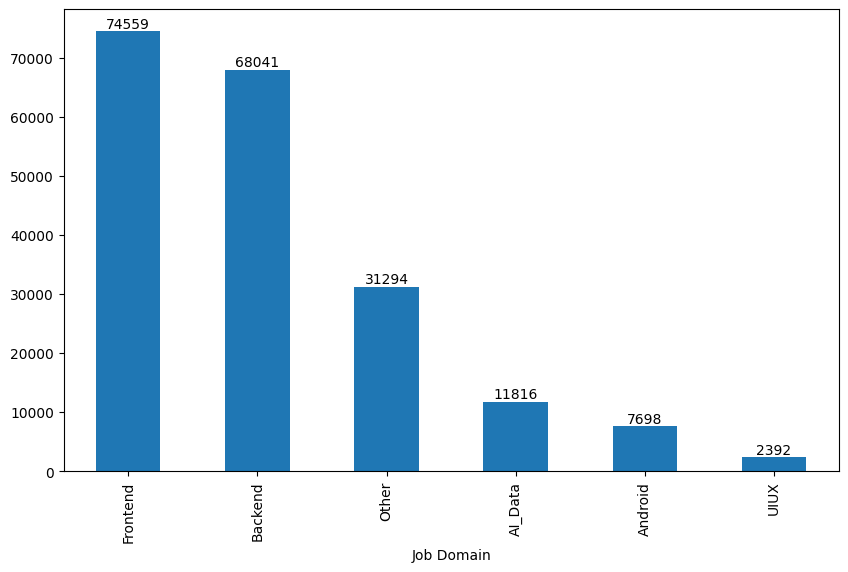

In [10]:
ax = df['Job Domain'].value_counts().plot(kind='bar', figsize=(10, 6))
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای سلول زیر، تعداد کاربران و آگهی های یکتا را خواهید دید.
</font>
</p>


In [11]:
n_users = df['Applicant ID'].nunique()
print(f"تعداد کاربران یکتا: {n_users}")

n_items = df['Job ID'].nunique()
print(f"تعداد آگهی های یکتا (آیتم‌ها): {n_items}")

تعداد کاربران یکتا: 29570
تعداد آگهی های یکتا (آیتم‌ها): 13799


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
سپس با استفاده از فرمول زیر می‌توان میزان پراکندگی (Sparsity) داده را محاسبه کرد. این فرمول نشان می‌دهد که چه نسبتی از ماتریس تعامل بین کاربران و آگهی‌ها فاقد داده است. هر چه مقدار پراکندگی به ۱ نزدیک‌تر باشد، ماتریس تعامل تهی‌تر بوده و مدل نیاز به روش‌های خاصی برای مقابله با کمبود داده خواهد داشت.
</font>
</p>


$Sparsity = 1 - \frac{\text{تعداد کل رزومه‌ها}}{\text{تعداد کاربران} \times \text{تعداد آگهی‌ها}}$



In [12]:
num_users = df['Applicant ID'].nunique()
num_ads = df['Job ID'].nunique()

num_interactions = len(df)
sparsity = 1.0 - (num_interactions / (num_users * num_ads))

print(f"تعداد کاربران منحصر به فرد: {num_users}")
print(f"تعداد آگهی‌های منحصر به فرد: {num_ads}")
print(f"تعداد کل رزومه‌ها (تعاملات): {num_interactions}")
print("-" * 30)
print(f"پراکندگی (Sparsity) ماتریس: {sparsity:.2%}")

تعداد کاربران منحصر به فرد: 29570
تعداد آگهی‌های منحصر به فرد: 13799
تعداد کل رزومه‌ها (تعاملات): 195800
------------------------------
پراکندگی (Sparsity) ماتریس: 99.95%


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این نتیجه کاملاً طبیعی و مورد انتظار برای این نوع داده‌ها است و نکته بسیار مهمی را به شما نشان می‌دهد. به زبان ساده، این عدد یعنی اگر شما یک جدول غول‌پیکر بسازید که در آن هر سطر یک کاربر و هر ستون یک آگهی باشد، 99.95% از خانه‌های این جدول خالی خواهد بود. این یعنی تقریبا هیچ کاربری برای اکثر آگهی‌ها رزومه نفرستاده است. دقیقاً به همین دلیل است که از الگوریتم‌های هوشمند به جای جستجوی ساده استفاده می‌شود. البته در درسنامه ها ذکر شد الگوریتم های IBCF کمی در برابر این موضوعات مقاوم تر هستند اما به هرحال استفاده از مدل های ترکیبی یا پیچیده تر مثل یادگیری ماشین و شبکه های عصبی ارجح تر هستند. البته که در این پروژه قرار است از UBCF برای حل مسئله استفاده کرد.
</font>
</p>




In [13]:
df.groupby('Applicant ID')['Job ID'].nunique().describe()

,Job ID
count,29570.000000
mean,6.621576
std,19.490359
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,882.000000


In [14]:
user_most_applied_jobs = df.groupby('Applicant ID')['Job ID'].nunique().idxmax()

df[df['Applicant ID'] == user_most_applied_jobs]

,Applicant ID,Source,Order,Developer State,Seen,Job ID,Job Title,Careers Job - Job → Level,Careers Job - Job → Offers Remote,Careers Job - Job → Minimum Salary,Careers Job - Job → Maximum Salary,Careers Job - Job → Hit Count,Accounts City - City → Name,Careers Disqualifyreason - Disqualify Reason → Name,Job_ID_Title,normal_title,Job Domain
138,4129344.0,1,0,30,True,366120,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,درخواست حقوق بالا,366120 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend
206,4129344.0,1,0,30,True,540960,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,اسپم,540960 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend
365,4129344.0,1,0,30,True,136344,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,عدم شرکت در مصاحبه,136344 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend
374,4129344.0,1,0,30,True,520992,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,درخواست حقوق بالا,520992 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend
448,4129344.0,1,0,30,True,300048,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,عدم شرکت در مصاحبه,300048 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198105,4129344.0,1,0,30,True,80928,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,درخواست حقوق بالا,80928 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend
198568,4129344.0,1,0,30,True,118128,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,عدم شرکت در مصاحبه,118128 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend
198997,4129344.0,1,0,30,True,255984,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,عدم تناسب با موقعیت شغلی,255984 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend
199000,4129344.0,1,0,30,True,300408,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,استخدام در جای دیگر,300408 - توسعه‌دهنده‌ی Front-end,developer frontend,Frontend


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
باید دو ستون جدید ایجاد کنید. هر ردیف ما نشان دهنده یک تعامل است یعنی شخصی به این آیدی به یک آگهی رزومه فرستاده است. پس یک ستون جدید به نام <code>interaction</code> ایجاد کنید. تمام مقادیر ستون ایجاد شده را برابر 1 قرار دهید. ستون بعدی ترکیب دو ستون <code>Job ID</code> و <code>Job Title</code> است. هدف ما در نهایت ستون <code>Job ID</code> است اما از انجا که خود IDها در مرحله نهایی گنگ و نامفهوم هستند ما ستون عنوان شغلی را هم به آن وصل میکنیم. اما همچنان یکتا بودن اگهی ها با توجه به حضور ID حفظ شده.
</font>
</p>


In [15]:
df['interaction'] = 1

df['Job_ID_Title'] = df['Job ID'].astype(str) + ' ' + df['normal_title']

df.head()

,Applicant ID,Source,Order,Developer State,Seen,Job ID,Job Title,Careers Job - Job → Level,Careers Job - Job → Offers Remote,Careers Job - Job → Minimum Salary,Careers Job - Job → Maximum Salary,Careers Job - Job → Hit Count,Accounts City - City → Name,Careers Disqualifyreason - Disqualify Reason → Name,Job_ID_Title,normal_title,Job Domain,interaction
0,4129056.0,1,0,25,True,280920,توسعه‌دهنده‌ی Front-end,NaN,False,NaN,NaN,0,NaN,NaN,280920 developer frontend,developer frontend,Frontend,1
1,6696432.0,2,0,30,True,293544,توسعه‌دهنده Back-end,junior,True,8000000.0,12000000.0,0,تهران,عدم تناسب با موقعیت شغلی,293544 developer backend,developer backend,Backend,1
2,4823712.0,2,4,20,True,68232,توسعه‌دهنده React,senior,False,8000000.0,12000000.0,0,مشهد,NaN,68232 developer react,developer react,Frontend,1
3,8995152.0,2,2,20,True,509400,Software Engineer (Front-end),junior,True,NaN,NaN,2092,تهران,NaN,509400 software engineer (frontend),software engineer (frontend),Frontend,1
4,9651120.0,2,5,30,True,423384,برنامه‌نویس ارشد .NET,senior,True,NaN,NaN,423,آمل,عدم تناسب با موقعیت شغلی,423384 developer senior .net,developer senior .net,Backend,1


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بالاتر بردن کیفیت داده ها در سیستم های پیشنهاد دهنده، یکی از کارهایی که می توانیم بکنیم فیلتر کردن داده هاست. برای مثال در این دیتاست از شما میخواهیم که در سلول زیر شغل هایی که کمتر از 15 درخواست برای آنها ثبت شده است را حذف کنید. و در ادامه کاربرانی که به کمتر از 10 آگهی درخواست داده اند نیز حذف شود. این کار هم باعث کاهش ابعاد دیتاست و حجم محاسبات میشود و هم باعث میشود نویز و داده های نادر حذف شوند که البته مزایا و معایب خود را دارد.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:green"><b>راهنمایی:</b></span>
ترتیب حذف ردیف ها اهمیت دارد. همانطور که گفته شد، ابتدا آگهی ها را فیتلر کنید و سپس کاربران.
</font>
</p>




In [16]:
min_apps_per_job = 15
min_jobs_per_user = 10

job_counts = df['Job ID'].value_counts()
jobs_to_keep = job_counts[job_counts >= min_apps_per_job].index
df = df[df['Job ID'].isin(jobs_to_keep)]

user_counts = df['Applicant ID'].value_counts()
users_to_keep = user_counts[user_counts >= min_jobs_per_user].index
df = df[df['Applicant ID'].isin(users_to_keep)]

df = df.reset_index(drop=True)
df.head()

,Applicant ID,Source,Order,Developer State,Seen,Job ID,Job Title,Careers Job - Job → Level,Careers Job - Job → Offers Remote,Careers Job - Job → Minimum Salary,Careers Job - Job → Maximum Salary,Careers Job - Job → Hit Count,Accounts City - City → Name,Careers Disqualifyreason - Disqualify Reason → Name,Job_ID_Title,normal_title,Job Domain,interaction
0,6696432.0,2,0,30,True,293544,توسعه‌دهنده Back-end,junior,True,8000000.0,12000000.0,0,تهران,عدم تناسب با موقعیت شغلی,293544 developer backend,developer backend,Backend,1
1,8995152.0,2,2,20,True,509400,Software Engineer (Front-end),junior,True,NaN,NaN,2092,تهران,NaN,509400 software engineer (frontend),software engineer (frontend),Frontend,1
2,7051488.0,1,110,10,False,516984,Python Back-end Web Developer,intern,True,NaN,NaN,2845,NaN,NaN,516984 python backend web developer,python backend web developer,Backend,1
3,5500704.0,2,1,30,True,542352,کارآموز Back-end,junior,False,NaN,NaN,3365,مشهد,عدم تناسب با موقعیت شغلی,542352 intern backend,intern backend,Backend,1
4,5105472.0,2,22,20,True,140400,توسعه‌دهنده لاراول,junior,True,4000000.0,6000000.0,0,تهران,NaN,140400 developer laravel,developer laravel,Backend,1


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر دیتاست نهایی تمیز شده را در df ذخیره کرده باشید و سلول زیر را اجرا کنید، خواهید دید که با این روش فیلتر کردن داده، کمی از پراکندگی داده کاسته شده. و البته که بخشی از داده های واقعی را از دست دادیم که ممکن است مشکل شروع سرد را حاد تر کند. در اینجور مواقع بهتر است از سیستم های ترکیبی استفاده شود یا مثلا محبوب ترین اگهی شغلی آن تاریخ را به کاربر پیشنهاد دهیم یا به سیستم های مبتنی بر محتوا برای کاربرانی که اولین تراکنش ها را انجام میدهند روی بیاوریم و... .
</font>
</p>




In [17]:
num_users = df['Applicant ID'].nunique()
num_ads = df['Job ID'].nunique()

num_interactions = len(df)
sparsity = 1.0 - (num_interactions / (num_users * num_ads))

print(f"تعداد کاربران منحصر به فرد: {num_users}")
print(f"تعداد آگهی‌های منحصر به فرد: {num_ads}")
print(f"تعداد کل رزومه‌ها (تعاملات): {num_interactions}")
print("-" * 30)
print(f"پراکندگی (Sparsity) ماتریس: {sparsity:.2%}")

تعداد کاربران منحصر به فرد: 3746
تعداد آگهی‌های منحصر به فرد: 3267
تعداد کل رزومه‌ها (تعاملات): 79248
------------------------------
پراکندگی (Sparsity) ماتریس: 99.35%


In [18]:
df.groupby('Applicant ID')['interaction'].sum().sort_values(ascending=False).min()

10

In [19]:
df.groupby('Job ID')['interaction'].sum().sort_values(ascending=False).min()

1

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت چهارم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از متد <code>pivot_table</code> کتابخانه <code>Pandas</code> ماتریس کاربر-آیتم خود را بسازید. ستون های این ماتریس موقعیت شغلی های مختلف هستند که در قسمت قبل ستون آن را ساختیم. و سطر این ماتریس، آیدی کاربران است. همچنین اگر ارتباطی واقعا بوده باشد مقدار 1 و اگر تعاملی نباشد بین اگهی و کاربر، مقدار صفر قرار دهید.
</font>
</p>


<h4 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نکته
</font>
</h4>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
توجه کنید در حالت عادی ما با دو ستون آیدی کاربر (Applicant ID) و آیدی آگهی (Job ID) میتوانیم این ماتریس را بسازیم یعنی سطرهای این ماتریس، ایدی کاربر است و ستون ها ایدی اگهی؛ اما در این پروژه برای اینکه دید بهتری از اینکه چه کاری انجام میدهیم داشته باشیم، خواهشمند است که از ستون <code>Job_ID_Title</code> برای ساخت ماتریس تعامل استفاده کنید تا علاوه بر ایدی اگهی، عنوان ان را هم داشته باشیم.
<br>
نمونه ای از ماتریس تعامل ما به شکل زیر میشود. دوباره تاکید میشود شما میتوانید مانند پروژه قبل تنها با آیدی آیتم، ماتریس خود را بسازید و اینکه عنوان شغلی را در این پروژه اضافه کردیم تنها جنبه آموزشی و کاربردی دارد.
</font>
</p>

![image.png](attachment:image.png)

In [20]:
# ماتریس تعامل خود را بسازید
user_item_matrix = df.pivot_table(index='Applicant ID', columns='Job_ID_Title', values='interaction', fill_value=0)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریس کاربر-آیتم خود را نمایش دهید.
</font>
</p>


In [21]:
print(user_item_matrix.shape)
user_item_matrix.head(15)

(3746, 3267)


Job_ID_Title,100008 specialist artificial intelligence (nlp),100272 designer web,100608 intern developer frontend,100632 intern developer android,100680 developer frontend,101064 developer frontend,101328 software engineer,101376 software engineer frontend,101400 developer frontend,102264 intern developer,...,99240 developer python) backend),99264 php developer,99336 developer حرفه‌ای مwebایل,99624 developer python,99648 developer جوان frontend,99672 developer frontend,99696 developer android,99720 developer frontend,99744 developer frontend,99768 developer backend
Applicant ID,,,,,,,,,,,,,,,,,,,,,
12000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22416.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37872.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58512.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97872.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100944.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
آیدی 15 کاربری که بیشترین درخواست را داده اند یعنی بیشترین رزومه را برای آگهی ها فرستاده اند همراه با تعداد درخواست ها چاپ کنید.
</font>
</p>

In [22]:
users_most_applied = df.groupby('Applicant ID')['interaction'].sum().sort_values(ascending=False)
print(users_most_applied.head(15))

ads_most_applied = df.groupby('Job_ID_Title')['interaction'].sum().sort_values(ascending=False)
print(ads_most_applied.head(15))

Applicant ID
10894224.0    198
3902592.0     184
3237456.0     183
5813664.0     147
5105952.0     141
5401248.0     140
2275008.0     136
8049936.0     115
5202816.0     112
3435024.0     110
2674848.0     104
7769856.0     103
5500704.0     101
9985248.0     101
3579744.0      97
Name: interaction, dtype: int64
Job_ID_Title
427320 django internship (remote or hybrid)    211
466056 django internship (remote or hybrid)    208
397704 intern python (python) + دستمزد         200
444600 python/django developer                 178
465600 django internship (remote or hybrid)    177
449232 junior frontend developer               162
411264 frontend engineer | engineering         156
443400 developer frontend                      156
445776 frontend developer                      154
465552 developer junior backend (django)       153
441288 developer frontend                      141
474456 developer frontend react                139
509400 software engineer (frontend)            137
477696 ju

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
شباهت سنجی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به قلب سیستم های پالایش جمعی رسیدیم. در این مرحله شما باید بین کاربران شباهت سنجی کنید و ماتریس کاربر-کاربر را بسازید. از آنجایی که داده های ما به شکل صفر و یک هستند، شباهت ژاکارد انتخاب بهتری نسبت به بقیه معیارهای شباهت سنجی بنظر میرسد. البته شما باید فاصله ژاکارد را بدست آورده و برای تبدیل به شباهت، 1 را از آن کم کنید. یعنی شباهت ژاکارد برابر است با 1 - فاصله ژاکارد. ماتریس کاربر- کاربر را به این شکل بسازید. در نهایت شما باید ماتریسی داشته باشید که سطر ها و ستون های آن آیدی کاربران و درایه های ان میزان شباهت کاربران به یکدیگر است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:green"><b>راهنمایی:</b></span>
این مرحله ممکن است با توجه به منابع سخت افزاری سیستم شما تا حتی یک ساعت هم طول بکشد پس صبور باشید.
</font>
</p>


In [23]:
from scipy.spatial.distance import pdist, squareform

# Calculate Jaccard distance
jaccard_distance_array = pdist(user_item_matrix.values, metric='jaccard')

# Convert distance to similarity (1 - distance)
jaccard_similarity_array = 1 - jaccard_distance_array

In [24]:
jaccard_similarity_array.shape

(7014385,)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ششم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ماتریس بدست که به شکل آرایه است را به دیتافریم تبدیل کنید.
<br>
خروجی شما باید دیتافریمی به شکل زیر باشد که نشان میدهد هر کاربر با توجه به سوابق ارسال رزومه های خود چقدر به یکدیگر شبیه هستند. در ادامه از دل این شباهت بین کاربران سعی خواهیم کرد لیست پیشنهادی آگهی به کاربر بدهیم.
</font>
</p>

![image.png](attachment:image.png)

In [25]:
from scipy.spatial.distance import squareform

# Convert the similarity array to a square matrix and then to a DataFrame
user_similarity_jaccard = pd.DataFrame(squareform(jaccard_similarity_array),
                                      index=user_item_matrix.index,
                                      columns=user_item_matrix.index)

In [26]:
user_similarity_jaccard.head()

Applicant ID,12000.0,22416.0,37872.0,38400.0,58512.0,66624.0,97872.0,100944.0,106080.0,106704.0,...,19099680.0,19205808.0,19384608.0,19439808.0,19710096.0,19835952.0,19861104.0,20031648.0,20260320.0,20303904.0
Applicant ID,,,,,,,,,,,,,,,,,,,,,
12000.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.020833,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
22416.0,0.0,0.000000,0.030303,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
37872.0,0.0,0.030303,0.000000,0.0,0.0,0.0,0.017544,0.054054,0.02439,0.0,...,0.0,0.000000,0.0,0.033333,0.039216,0.0,0.0,0.0,0.0,0.0
38400.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,0.043478,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
58512.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در فصل بعد که ما با راهبرد IBCF سر و کار خواهیم داشت، خروجی ماتریس شباهت ما یک ماتریس آیتم-آیتم خواهد بود که آن ماتریس شاید از لحاظ عنوانی دید بهتری به ما بدهد. آن ماتریس نشان خواهد داد با توجه به سوابق ارسال، کدام آگهی های شغلی به یکدیگر شبیه ترند و بعد براساس شباهت بین آیتم ها لیست نهایی تولید میشود.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هفتم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
به مرحله تقریبا نهایی رسیدیم، در این مرحله باید با توجه به ماتریس شباهتی که از کاربران داریم برای یک کاربر مورد نظرمون 10 آگهی پیشنهاد بدیم تا از آن استفاده کند. در این سلول شما باید تابعی بنویسید که آیدی کاربران را به شکل <code>float</code> دریافت کرده و با توجه به 10 همسایه نزدیک، لیستی از 10 اگهی با بیشترین امتیاز را برگرداند. خروجی نهایی باید شامل سه ستون <code>Job_ID_Title</code>, <code>Score</code> و <code>Job Domain</code> باشد.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: center;font-family: vazir;font-size: medium">
ترتیب ستون های جدول باید به شکل زیر باشد:
</p>

<table>
<thead>
<tr>
<th style="text-align:center">Job_ID_Title</th>
<th style="text-align:center">Score</th>
<th style="text-align:center">Job Domain</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">مقدار ۱</td>
<td style="text-align:center">مقدار ۲</td>
<td style="text-align:center">مقدار ۳</td>
</tr>
<tr>
<td style="text-align:center">مقدار ۴</td>
<td style="text-align:center">مقدار ۵</td>
<td style="text-align:center">مقدار ۶</td>
</tr>
<tr>
<td style="text-align:center">مقدار ۷</td>
<td style="text-align:center">مقدار ۸</td>
<td style="text-align:center">مقدار ۹</td>
</tr>
</tbody>
</table>


In [52]:
def recommender_system(user_id, num_recommendations=10, num_neighbors=10,
                       user_similarity_df=user_similarity_jaccard,
                       user_item_matrix_df=user_item_matrix,
                       original_df=df):
    """
    Recommends job postings to a user, optimized to match user's job domains.
    """
    if user_id not in user_similarity_df.index:
        print(f"Error: User ID {user_id} not found in the similarity matrix.")
        return pd.DataFrame(columns=['Job_ID_Title', 'Score', 'Job Domain'])

    # Step 1: Get similar users (excluding self)
    user_similarities = user_similarity_df.loc[user_id]
    similar_users = user_similarities.sort_values(ascending=False).iloc[1:num_neighbors+1]

    # Step 2: Find jobs the user already applied to
    user_jobs = user_item_matrix_df.loc[user_id]
    applied_jobs = user_jobs[user_jobs > 0].index.tolist()

    # Step 3: Identify user's most frequent job domain
    user_history = original_df[original_df['Applicant ID'] == user_id]
    most_frequent_domain = user_history['Job Domain'].value_counts().idxmax()
    job_domain_map = original_df.set_index('Job_ID_Title')['Job Domain'].to_dict()


    # Step 4: Initialize job scores
    job_scores = {}
    domain_boost = 1.1  # Boost factor for matching domain

    for neighbor_id, similarity in similar_users.items():
        neighbor_jobs = user_item_matrix_df.loc[neighbor_id]
        neighbor_applied_jobs = neighbor_jobs[neighbor_jobs > 0].index.tolist()

        for job in neighbor_applied_jobs:
            if job in applied_jobs:
                continue

            # Base score from similarity
            score = similarity

            # Boost if job domain is in user's preferred domains
            job_domain = job_domain_map.get(job)
            if job_domain == most_frequent_domain:
                score *= domain_boost

            # Aggregate
            if job not in job_scores:
                job_scores[job] = 0
            job_scores[job] += score

    if not job_scores:
        print("No suitable jobs found from neighbors. Returning empty.")
        return pd.DataFrame(columns=['Job_ID_Title', 'Score', 'Job Domain'])

    # Normalize scores by number of contributing neighbors
    # (Optional — helps reduce popularity bias)
    # for job in job_scores:
    #     job_scores[job] /= num_neighbors

    # Sort and take top N
    recommended_jobs = sorted(job_scores.items(), key=lambda x: x[1], reverse=True)[:num_recommendations]

    # Prepare result DataFrame
    recommended_jobs_df = pd.DataFrame(recommended_jobs, columns=['Job_ID_Title', 'Score'])
    job_domain_map = original_df.set_index('Job_ID_Title')['Job Domain'].to_dict()
    recommended_jobs_df['Job Domain'] = recommended_jobs_df['Job_ID_Title'].map(job_domain_map)

    return recommended_jobs_df[['Job_ID_Title', 'Score', 'Job Domain']]

In [46]:
user_id = df['Applicant ID'].iloc[0]
display(recommender_system(user_id))

,Job_ID_Title,Score,Job Domain
0,268896 developer python/django (intern),0.817036,Backend
1,386808 developer junior backend (django),0.627598,Backend
2,397704 intern python (python) + دستمزد,0.604802,Backend
3,273096 junior backend developer(django),0.594998,Backend
4,270792 backend developer,0.580194,Backend
5,318072 developer backend,0.559449,Backend
6,280848 developer django) backend),0.532575,Backend
7,396336 developer backend,0.451128,Backend
8,346992 developer junior backend (django),0.428331,Backend
9,394368 developer python (python),0.428331,Backend


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هشت
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تابع زیر را اجرا کنید. تابع زیر یک ایدی کاربران را دریافت میکند و 15 مورد از اگهی هایی که یک فرد رزومه ارسال کرده را نمایش میدهد. میتوانید با آیدی های متفاوت تابع را تست کنید.
</font>
</p>


In [54]:
def get_user_applied_jobs_with_domain(user_id, main_df, num_jobs_to_return=15, user_item_matrix_df=user_item_matrix):
    if user_id not in user_item_matrix_df.index:
        print(f"خطا: کاربر با شناسه '{user_id}' در ماتریس کاربر-آیتم یافت نشد.")
        return pd.DataFrame(columns=['Job_ID_Title', 'Job Domain'])

    user_interactions_series = user_item_matrix_df.loc[user_id]
    applied_jobs_series = user_interactions_series[user_interactions_series >= 1.0]
    applied_jobs_list = applied_jobs_series.index.tolist()

    if not applied_jobs_list:
        print(f"کاربر '{user_id}' به هیچ شغلی رزومه نفرستاده است.")
        return pd.DataFrame(columns=['Job_ID_Title', 'Job Domain'])

    applied_jobs_details = main_df[main_df['Job_ID_Title'].isin(applied_jobs_list)]
    result_df = applied_jobs_details[['Job_ID_Title', 'Job Domain']]

    return result_df.head(num_jobs_to_return)

get_user_applied_jobs_with_domain(user_id=3902592.0, main_df=df)

,Job_ID_Title,Job Domain
7,432192 junior python developer,Backend
13,352320 junior frontend developer (react),Frontend
15,111048 intern developer front end,Frontend
26,108264 intern frontend,Frontend
32,347904 developer frontend,Frontend
46,281952 developer frontend,Frontend
50,412416 frontend developer,Frontend
61,331848 developer frontend,Frontend
73,508416 (django) senior python developer,Backend
76,523944 developer backend,Backend


In [55]:
result = get_user_applied_jobs_with_domain(user_id=3902592.0, main_df=df)
result['Job Domain'].value_counts() / result['Job Domain'].value_counts().sum()

,count
Job Domain,
Frontend,0.733333
Backend,0.266667


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای مثال کاربر <code>3902592.0</code> بیش از 90 درصد رزومه های خود را برای آگهی شغلی هایی در حوزه توسعه front-end ارسال کرده است پس باید از سیستم ubcf خود انتظار داشته باشیم تا لیست پیشنهادی شامل آگهی هایی در همین حوزه باشد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هشت ممیز یک
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابعی که در مرحله قبل نوشتید، برای کاربر <code>3902592.0</code> 10 آگهی پیشنهاد دهید و نتیجه آن را در یک فایل csv با نام <code>3902592.csv</code> ذخیره کنید.
</font>
</p>


In [56]:
user_id = 3902592.0
display(recommender_system(user_id))
recommender_system(user_id).to_csv(f"{int(user_id)}.csv", index=False)

,Job_ID_Title,Score,Job Domain
0,425112 frontend developer,0.206209,Frontend
1,391584 react js frontend developer,0.199779,Frontend
2,286824 developer frontend,0.142440,Frontend
3,378216 developer frontend,0.140398,Frontend
4,399576 developer react intern,0.137459,Frontend
5,401376 specialist frontend(حضوری / دور کاری),0.137459,Frontend
6,403272 developer react.js,0.137459,Frontend
7,428256 senior frontend developer (react),0.137459,Frontend
8,300456 frontend developer (vuejs),0.136865,Frontend
9,311976 developer frontend و reactjs,0.136865,Frontend


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
باید انتظار داشته باشیم که لیست پیشنهادی برای کاربر <code>3902592.0</code> بیشتر شامل آگهی های حوزه توسعه front-end باشد؛ آیا همینطور است و سیستم موفق عمل کرده است؟
<br>
البته اگر دقت کنید امتیازهای نهایی بسیار پایین است. دلیل به همان پراکندگی زیاد ماتریس برمیگردد و این یعنی با این راهبرد قطعیتی روی اینکه پیشنهادات ما لزوما درست باشند نداریم. در فصل آینده به این مجموعه داده از نگاه IBCF می اندیشیم و سعی میکنیم سیستم را براساس این ایده جلو ببریم. حتما این نتایج را بخاطر بسپارید و با نتایج IBCF مقایسه کنید.
</font>
</p>


<h4 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ارزیابی
</font>
</h4>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اگر به نوعی ما <code>هم حوزه</code> بودن را به عنوان این درنظر بگیریم که کاربر پس از دیدن آیتم پیشنهادی از ان راضی خواهد بود، پس میتوانیم نوعی از معیار ارزیابی را به همین شکل تعریف کنیم. در مثال زده شده دیدیم که کاربر ما بیش از 90 درصد رزومه های ارسالی خود را در حوزه front-end ارسال کرده است پس نتیجه میگیریم کاربر به این حوزه علاقمند است و ترجیح ارسال رزومه در این حوزه را دارد پس فرض میکنیم باید اگهی هایی را پیشنهاد دهیم که دقیقا در همین حوزه باشد.

<br>
در نتیجه ما معیار <code>Precision@10</code> را اینطور تعریف میکنیم که از بین 10 آگهی لیست پیشنهادی شما، چند درصد در حوزه کاری فرد(مرتبط) بوده است. یعنی سیستم داوری کوئرا بر این اساس فایل پاسخ شما را ارزیابی و نمره دهی میکند. برای مثال اگر در قسمت هشت ممیز یک از بین لیست پیشنهادی 10 تایی شما، 7 مورد در حوزه front-end باشند، Precision@10 برابر 70 درصد خواهد بود.
</font>
</p>



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هشت ممیز دو
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابعی که در مرحله قبل نوشتید، برای کاربر <code>3579744.0</code> 10 آگهی پیشنهاد دهید و نتیجه آن را در یک فایل csv با نام <code>3579744.csv</code> ذخیره کنید.
</font>
</p>


In [57]:
user_id = 3579744.0
display(recommender_system(user_id))
recommender_system(user_id).to_csv(f"{int(user_id)}.csv", index=False)

,Job_ID_Title,Score,Job Domain
0,283008 developer backend (python),0.479011,Backend
1,150864 developer backend,0.413235,Backend
2,297096 backend developer (django),0.398962,Backend
3,331632 developer backend (django),0.394936,Backend
4,338496 developer python python,0.394936,Backend
5,159768 مهندس جوان software سمت سرور,0.382410,Other
6,102864 developer (backend(python,0.381066,Backend
7,129624 developer python,0.321376,Backend
8,171000 python developer (django),0.317945,Backend
9,293304 developer python,0.315652,Backend


In [58]:
result = recommender_system(user_id)
result['Job Domain'].value_counts() / result['Job Domain'].value_counts().sum()

,count
Job Domain,
Backend,0.9
Other,0.1


In [59]:
result = get_user_applied_jobs_with_domain(user_id=3579744.0, main_df=df)
result['Job Domain'].value_counts() / result['Job Domain'].value_counts().sum()

,count
Job Domain,
Backend,0.800000
Frontend,0.133333
AI_Data,0.066667


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هشت ممیز سه
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابعی که در مرحله قبل نوشتید، برای کاربر <code>5813664.0</code> 10 آگهی پیشنهاد دهید و نتیجه آن را در یک فایل csv با نام <code>5813664.csv</code> ذخیره کنید.
</font>
</p>


In [60]:
user_id = 5813664.0
display(recommender_system(user_id))
recommender_system(user_id).to_csv(f"{int(user_id)}.csv", index=False)

,Job_ID_Title,Score,Job Domain
0,507408 frontend developer,1.342911,Frontend
1,508728 developer frontend,1.114067,Frontend
2,516840 developer frontend (reacttailwind),1.082175,Frontend
3,507168 frontend developer,0.931330,Frontend
4,538368 developer senior react.js,0.817307,Frontend
5,511560 developer frontend,0.794624,Frontend
6,518232 developer react js,0.775065,Frontend
7,509232 intern developer react.js,0.771805,Frontend
8,507528 senior frontend developer (react),0.754876,Frontend
9,520224 developer frontend,0.748584,Frontend


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت هشت ممیز چهار
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابعی که در مرحله قبل نوشتید، برای کاربر <code>7769856.0</code> 10 آگهی پیشنهاد دهید و نتیجه آن را در یک فایل csv با نام <code>7769856.csv</code> ذخیره کنید.
</font>
</p>


In [61]:
user_id = 7769856.0
display(recommender_system(user_id))
recommender_system(user_id).to_csv(f"{int(user_id)}.csv", index=False)

,Job_ID_Title,Score,Job Domain
0,342168 backend developer,0.539815,Backend
1,348768 backend developer (django),0.532945,Backend
2,339600 developer python,0.531888,Backend
3,333936 developer python,0.525333,Backend
4,363408 software engineer (backend),0.431951,Backend
5,352272 intern developer backend,0.427092,Backend
6,442728 junior python developer (سحابینو),0.425484,Backend
7,342936 developer backend,0.421981,Backend
8,427320 django internship (remote or hybrid),0.418457,Backend
9,359328 backend developer,0.341359,Backend


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [37]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "3902592.csv", "3579744.csv", "5813664.csv", "7769856.csv"]
compress(file_names)

File Paths:
['notebook.ipynb', '3902592.csv', '3579744.csv', '5813664.csv', '7769856.csv']


In [53]:
user_id = 3902592.0
print("Jobs applied by user", int(user_id))
display(get_user_applied_jobs_with_domain(user_id=user_id, main_df=df, num_jobs_to_return=20))

print("\nRecommended jobs for user", int(user_id))
display(recommender_system(user_id))

Jobs applied by user 3902592


,Job_ID_Title,Job Domain
7,432192 junior python developer,Backend
13,352320 junior frontend developer (react),Frontend
15,111048 intern developer front end,Frontend
26,108264 intern frontend,Frontend
32,347904 developer frontend,Frontend
46,281952 developer frontend,Frontend
50,412416 frontend developer,Frontend
61,331848 developer frontend,Frontend
73,508416 (django) senior python developer,Backend
76,523944 developer backend,Backend



Recommended jobs for user 3902592


,Job_ID_Title,Score,Job Domain
0,425112 frontend developer,0.206209,Frontend
1,391584 react js frontend developer,0.199779,Frontend
2,286824 developer frontend,0.142440,Frontend
3,378216 developer frontend,0.140398,Frontend
4,399576 developer react intern,0.137459,Frontend
5,401376 specialist frontend(حضوری / دور کاری),0.137459,Frontend
6,403272 developer react.js,0.137459,Frontend
7,428256 senior frontend developer (react),0.137459,Frontend
8,300456 frontend developer (vuejs),0.136865,Frontend
9,311976 developer frontend و reactjs,0.136865,Frontend
